# CMSE 202 Final Project: Evolution/Natural Selection

Bin Wen, Zachary Harless, Larissa Ford, 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import display, clear_output
import time
import random
import seaborn as sns

In [2]:
class animal():
    
    def __init__(self,x,y,temp,humid,species):
        self.x = x
        self.y = y
        
        self.temp = temp              #The optimal temperature for this animal
        
        #Note: the unit for humidity is simplified in this model. The value of humidity will be represented as a number
        self.humid = humid            #The optimal humidity for this animal
        
        self.hp = 100                 #The initial health point for each animal is 100.
        self.species = species
        
    def area(self):
        
        #Find which area this animal is.
        #ax is the x-index for area, while ay is the y-index.
        #Each area is 10 by 10, and there are 25 areas (5 by 5) in this 50 by 50 map.
        
        self.ax = 0
        self.ay = 0
        
        if self.x < 10:
            self.ax = 0
        if 10 <= self.x and self.x < 20:
            self.ax = 1
        if 20 <= self.x and self.x < 30:
            self.ax = 2
        if 30 <= self.x and self.x < 40:
            self.ax = 3
        if 40 <= self.x:
            self.ax = 4
            
        if self.y < 10:
            self.ay = 0
        if 10 <= self.y and self.y < 20:
            self.ay = 1
        if 20 <= self.y and self.y < 30:
            self.ay = 2
        if 30 <= self.y and self.y < 40:
            self.ay = 3
        if 40 <= self.y:
            self.ay = 4
        
        
    def temperature(self, envirtemp):
        # If the environment temperature is too far from the optimal temperature, the animal will lose health point.
        # How many health points are reduced depends on how far the environment temperature is from the optimal temperature.
        
        if envirtemp > (self.temp-20) and envirtemp < (self.temp-10):
            self.hp = self.hp - 20
        elif envirtemp < (self.temp+20) and envirtemp > (self.temp+10):
            self.hp = self.hp - 20
        elif envirtemp > (self.temp-30) and envirtemp < (self.temp-20):
            self.hp = self.hp - 50
        elif envirtemp < (self.temp+30) and envirtemp > (self.temp+20):
            self.hp = self.hp - 50
        elif envirtemp < (self.temp-30) or envirtemp > (self.temp+30):
            self.hp = self.hp - 100
            
    def humidity(self, envirhumid):
        # If the environment humidity is too far from the optimal humidity, the animal will lose health point.
        # How many health points are reduced depends on how far the environment humidity is from the optimal temperature.
        # The impact from humidity won't be as big as temperature
        
        if envirhumid > (self.humid-20) and envirhumid < (self.humid-10):
            self.hp = self.hp - 10
        elif envirhumid < (self.humid+20) and envirhumid > (self.humid+10):
            self.hp = self.hp - 10
        elif envirhumid > (self.humid-30) and envirhumid < (self.humid-20):
            self.hp = self.hp - 25
        elif envirhumid < (self.humid+30) and envirhumid > (self.humid+20):
            self.hp = self.hp - 25
        elif envirhumid < (self.humid-30) or envirhumid > (self.humid+30):
            self.hp = self.hp - 50
    
    def age(self):
        #As the age of the animal grow, their health point will also reduced.
        self.hp = self.hp - 10
    
    def overcapacity(self, capacity, count):
        
        #If there's too many animals on the same coordinate, then this animal would lose health
        
        x = self.x
        y = self.y
        
        c = count[x,y]
        
        if c >= capacity:
            self.hp = self.hp - 30
            
        if c >= 1.5 * capacity:
            self.hp = self.hp - 60
    
    def die(self):
        #The animial will die if hp is less than or equal to 0
        
        self.dead = 0
        
        if self.hp <= 0:
            self.dead = 1
        else:
            self.dead = 0
    
    def move(self):
        
        x = self.x
        y = self.y
        
        randnum1 = np.random.rand()
        
        #The value of this random number decides where the animal would move
        if randnum1 < 0.25:
            x = x - 1            
        if 0.25 <= randnum1 and randnum1 <0.5:
            x = x + 1
        if 0.5 <= randnum1 and randnum1 <0.75:
            y = y - 1
        if 0.75 <= randnum1:
            y = y + 1
        
        #Make sure the animal don't go out of the map
        if(x < 0):
            x = 0
        if(y < 0):
            y = 0
        if(x > 49):
            x = 49
        if(y > 49):
            y = 49
        
        self.x = x
        self.y = y
    
    def offspring(self, birth_rate, mutation_rate):
        
        randnum2 = np.random.rand()       #Decides whether there'll be a new animal born or not
        randnum3 = np.random.rand()       #Decides whether the new animal's optimal temperature will change
        randnum4 = np.random.rand()       #Decides whether the new animal's optimal humidity will change
        randnum5 = np.random.randint(2)   #Decides the direction of change for the new animal's optimal temperature
        randnum6 = np.random.randint(2)   #Decides the direction of change for the new animal's optimal humidity
        
        if randnum2 < birth_rate:
            
            if randnum3 < mutation_rate:
                if randnum5 == 0:
                    new_temp = self.temp + 1
                else:
                    new_temp = self.temp - 1
            else:
                new_temp = self.temp
                    
            if randnum4 < mutation_rate:
                if randnum6 == 0:
                    new_humid = self.humid + 1
                else:
                    new_humid = self.humid - 1
            else:
                new_humid = self.humid
            
            
            new_animal = animal(x = self.x, y = self.y, temp = new_temp, humid = new_humid, species = self.species)
            
            return(new_animal)
        
        else:
            return None

In [3]:
class board():
    
    def __init__(self):
        
        self.animalcount = np.zeros((50, 50)) #This will be used to count how many animals are in each coordinate grid.
        self.temp = np.zeros((50, 50))
        self.humid = np.zeros((50, 50))
        
        self.humid[:,0:10] = -50
        self.humid[:,10:20] = -20
        self.humid[:,20:30] = 0
        self.humid[:,30:40] = 20
        self.humid[:,40:50] = 50
        
        self.temp[0:10,:] = -50
        self.temp[10:20,:] = -20
        self.temp[20:30,:] = 0
        self.temp[30:40,:] = 20
        self.temp[40:50,:] = 50
        
    def loctemp(self,x,y):                    #This method returns the temperature at a given coordinate
        
        loct = self.temp[x,y]
        return loct
        
    def lochumid(self,x,y):                   #This method returns the humidity at a given coordinate
        
        loch = self.humid[x,y]
        return loch

In [4]:
def animalcount(animals):           #This function check how many animals is at each coordinate
    
    animalcount1 = np.zeros((50, 50))
        
    for i in range(len(animals)):
        
        obj = animals[i]
        x = obj.x
        y = obj.y
            
        animalcount1[x,y] += 1
        
    return(animalcount1)

In [5]:
def areacount(animals):             #This function check how many animals is at each area
    
    areacount1 = np.zeros((5,5))
    
    for i in range(len(animals)):
        
        animals[i].area()
        
        obj = animals[i]
        ax = obj.ax
        ay = obj.ay
        
        areacount1[ax,ay] += 1
        
    return(areacount1)

In [6]:
def areaverage_temp(animals):        #This function calculate the average optimal temperature for all animals on each area.
    
    ac = areacount(animals)
    at = np.zeros((5,5))
    aa = np.zeros((5,5))
    
    for i in range(len(animals)):
        
        obj = animals[i]
        ax = obj.ax
        ay = obj.ay
        
        at[ax,ay] += animals[i].temp
        
    aa = at/ac
    return(aa)

In [7]:
def areaverage_humid(animals):       #This function calculate the average optimal humidity for all animals on each area.
    
    ac = areacount(animals)
    at = np.zeros((5,5))
    aa = np.zeros((5,5))
    
    for i in range(len(animals)):
        
        obj = animals[i]
        ax = obj.ax
        ay = obj.ay
        
        at[ax,ay] += animals[i].humid
        
    aa = at/ac
    return(aa)

In [8]:
def checkspecies(animals):        #This function how many animals for a species are on each area for different species
    
    sp1 = np.zeros((5,5))
    sp2 = np.zeros((5,5))
    sp3 = np.zeros((5,5))
    sp4 = np.zeros((5,5))
    
    for i in range(len(animals)):
        animals[i].area()
        ax = animals[i].ax
        ay = animals[i].ay
        
        if animals[i].species == '1':
            sp1[ax,ay] += 1
        elif animals[i].species == '2':
            sp2[ax,ay] += 1
        elif animals[i].species == '3':
            sp3[ax,ay] += 1
        elif animals[i].species == '4':
            sp4[ax,ay] += 1
            
    return sp1,sp2,sp3,sp4

In [9]:
def checkaverage(vals,ax,ay):     #This is a shortcut funtion to calculate average temperature/humidity for the result
    averages = vals[:,ax,ay]
    return averages

In [10]:
def run(animals, board1, num_interations, capacity1, birth_rate1, mutation_rate1):
    
    #initialize with empty lists/arrays
    
    timesteps = []
    
    #Stats will be stored as 3d-arrays, recording the stats at each interation on each coordinate/area
    animalcount1 = np.zeros((num_interations,50,50))
    areacount1 = np.zeros((num_interations,5,5))
    areaverage_temp1 = np.zeros((num_interations,5,5))
    areaverage_humid1 = np.zeros((num_interations,5,5))
    
    for i in range(num_interations):
        animalcount1[i] = animalcount(animals)             #Update the latest stats.
        areacount1[i] = areacount(animals)
        areaverage_temp1[i] = areaverage_temp(animals)
        areaverage_humid1[i] = areaverage_humid(animals)
        
        list_del = []                                      #Store the animals that die in this timestep
        list_new = []                                      #Store the animals that are born in this timestep
        
        for j in range(len(animals)):
            
            x = animals[j].x
            y = animals[j].y
            
            t = board1.loctemp(x, y)
            h = board1.lochumid(x, y)
            
            #Calculate how many health points are left
            
            animals[j].temperature(envirtemp = t)
            animals[j].humidity(envirhumid = h)
            animals[j].age()
            animals[j].overcapacity(capacity = capacity1, count = animalcount1[i])
            
            #Check whether the animal would die. Store the dead animal in the list
            animals[j].die()
            
            if animals[j].dead == 1:
                d = animals[j]
                list_del.append(d)
                
            #If the animal's not dead, it will move randomly
            else:
                animals[j].move()
            
            #And will posibly have an offspring. Store the new born (if there is one) in the list
            new = animals[j].offspring(birth_rate = birth_rate1, mutation_rate = mutation_rate1)
            if new != None:
                list_new.append(new)
        
        #Remove the dead animals from the animal list
        for k in range(len(list_del)):
            animals.remove(list_del[k])
        
        #Add the new born to the animal list
        for l in range(len(list_new)):
            n = list_new[l]
            animals.append(n)
        
        #Update the timestep to the timestep list
        timesteps.append(i)
    
    #Return the animal list and all the stats
    return(animals, animalcount1, areacount1, areaverage_temp1, areaverage_humid1, timesteps)

In [11]:
board1 = board()   #Create the map

Here's a visual representation of the map, the color represent temperature, and number represent humidity.

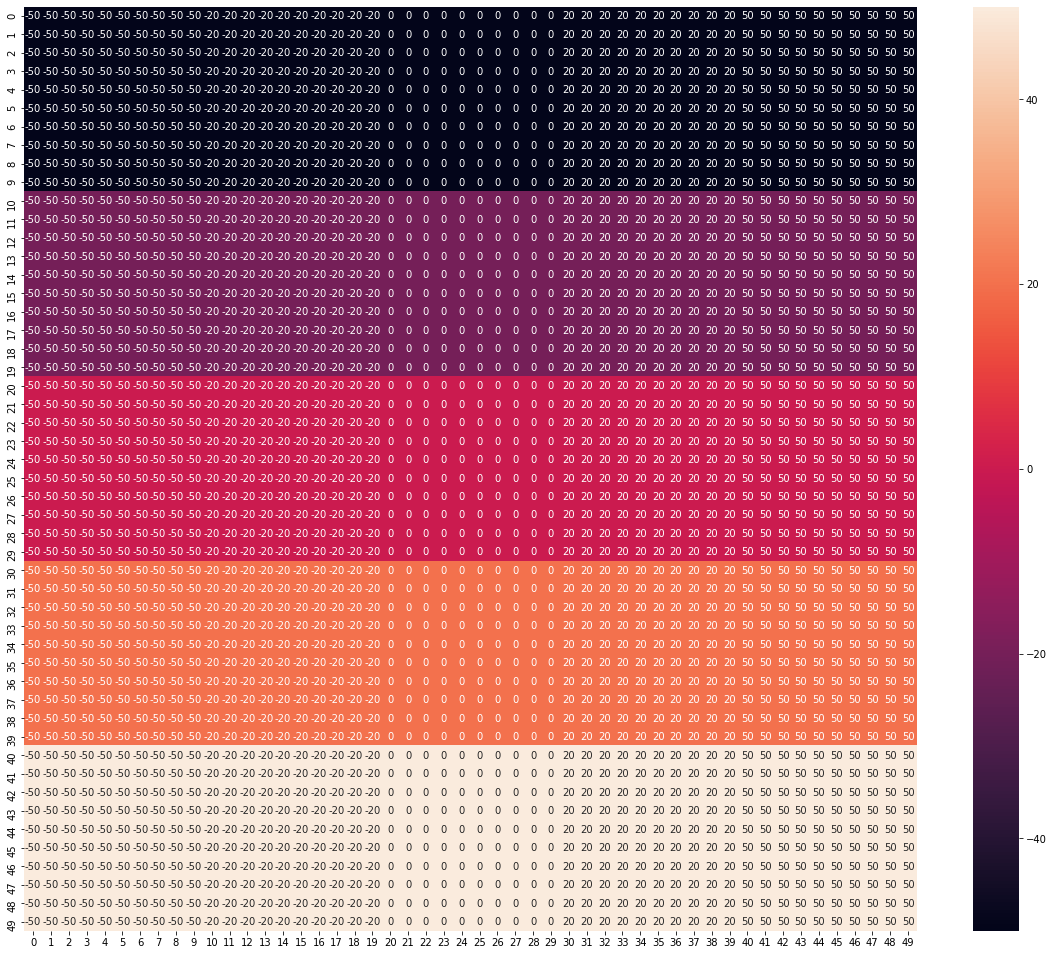

In [12]:
plt.figure(figsize = (20,17))
sns.heatmap(board1.temp, annot = board1.humid);

Fitst we create the intial animals.

Initially place 4 species on the 4 corners of the map, that each species have 5 animals.

The species are borned to servive in their environment, that the optimal temperature/humidity for them are the environment temperature/humidity at the corners.

In [13]:
animalsx = []

for i in range(5):
    animalsx.append(animal(x=0,y=0,temp = -50, humid = -50, species = '1'))
    
for i in range(5):
    animalsx.append(animal(x=0,y=49,temp = -50, humid = 50, species = '2'))
    
for i in range(5):
    animalsx.append(animal(x=49,y=0,temp = 50, humid = -50, species = '3'))
    
for i in range(5):
    animalsx.append(animal(x=49,y=49,temp = 50, humid = 50, species = '4'))

In [14]:
animalcount(animalsx) #Before we start, make sure all the animals are successfully placed on the map

array([[5., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 5.]])

In [15]:
np.random.seed(seed = 123456)    #Set a seed to make sure the result can be reproduced

#Run the simulation. 
#Note the birth_rate is set to 0.5 and mutation_rate is set to 0.8, both are quite high
#I'm trying to limit the number of steps I need to make sure all areas are filled with animals
animalsx, animalcount1, areacount1, areaverage_temp1, areaverage_humid1, timesteps = run(animals = animalsx, board1 = board1, num_interations = 210, capacity1 = 5, birth_rate1 = 0.5, mutation_rate1 = 0.8)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Check how the animals count in each area change overtime. 

In [16]:
areacount1

array([[[  5.,   0.,   0.,   0.,   5.],
        [  0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.],
        [  5.,   0.,   0.,   0.,   5.]],

       [[  9.,   0.,   0.,   0.,   8.],
        [  0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.],
        [  6.,   0.,   0.,   0.,   7.]],

       [[ 14.,   0.,   0.,   0.,  13.],
        [  0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.],
        [  8.,   0.,   0.,   0.,  10.]],

       ...,

       [[461., 455., 375., 460., 467.],
        [432., 443., 357., 445., 453.],
        [414., 369., 216., 304., 436.],
        [449., 511., 338., 425., 461.],
        [486., 488., 368., 449., 508.]],

       [[449., 489., 406., 449., 459.],
        [460., 448., 380., 456., 439.],
        [423., 379., 221., 318., 446.],
        [449., 462., 321., 413., 493.],
        [465., 484.

Let's check how the different species migrate over time.

In [17]:
sp1,sp2,sp3,sp4 = checkspecies(animalsx)

In [18]:
sp1

array([[439., 430., 160.,   3.,   0.],
       [497., 430.,  52.,   0.,   0.],
       [322., 263., 102.,   0.,   0.],
       [  5.,   6.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [19]:
sp2

array([[  0.,  12., 228., 382., 441.],
       [  0.,  14., 315., 410., 487.],
       [  0.,   0.,  44.,  60.,  81.],
       [  0.,   0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   0.,   0.]])

In [20]:
sp3

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [147., 102.,  54.,   0.,   0.],
       [414., 441., 285.,  13.,   0.],
       [475., 451., 218.,   2.,   0.]])

In [21]:
sp4

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   6.,  11.],
       [  0.,   0.,  30., 254., 404.],
       [  0.,   0.,  36., 387., 459.],
       [  0.,   0., 151., 421., 487.]])

There's a very clear path for how each species migrate to new areas and adapt the environment there.

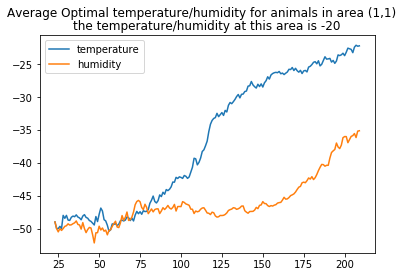

In [22]:
plt.plot(timesteps,checkaverage(areaverage_temp1,1,1),label = 'temperature')
plt.plot(timesteps,checkaverage(areaverage_humid1,1,1),label = 'humidity')
plt.title('the temperature/humidity at this area is -20')
plt.suptitle('Average Optimal temperature/humidity for animals in area (1,1)')
plt.legend(loc="upper left");

Here's a graph showing how the average optimal temperature/humidity for all animals in area (1,1) change over time. All of the animals that came to this area at the beiginning area from species 1, which come from area (0,0) with temperature/humidity of -50. They came to this area that the temperature/humidity is -20, and the graphs clearly shows how they adapt the environment.

Notice that they adapt to the temperture faster than they adapt to the humidity. Temperature is set to have a greater (actuall double) impact on animals in this model, and you can clearly see the difference.

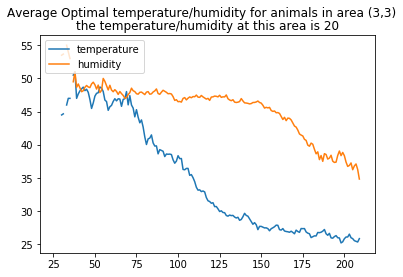

In [23]:
plt.plot(timesteps,checkaverage(areaverage_temp1,3,3),label = 'temperature')
plt.plot(timesteps,checkaverage(areaverage_humid1,3,3),label = 'humidity')
plt.title('the temperature/humidity at this area is 20')
plt.suptitle('Average Optimal temperature/humidity for animals in area (3,3)')
plt.legend(loc="upper left");

Here's another example using area (3,3). 

All of the animals that came to this area at the beiginning area from species 4, which come from area (4,4) with temperature/humidity of 50, while in this area, the temperature/humidity is 20.

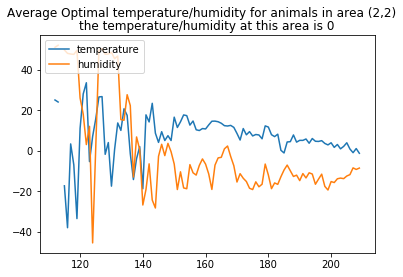

In [24]:
plt.plot(timesteps,checkaverage(areaverage_temp1,2,2),label = 'temperature')
plt.plot(timesteps,checkaverage(areaverage_humid1,2,2),label = 'humidity')
plt.title('the temperature/humidity at this area is 0')
plt.suptitle('Average Optimal temperature/humidity for animals in area (2,2)')
plt.legend(loc="upper left");

All 4 species eventually mirated into area(2,2), which is right in the middle, with temperature/humidity of 0. Although there's a lot of fluctuations at first, all the animals from the different species eventually adapt to the environment and their offspring's optimal temperature/humidity are getting closer and closer to the environment temperature/humidity.

Here's an animation showing how the animals migrate over time. The numbers represent how many animals are on each coordinate.

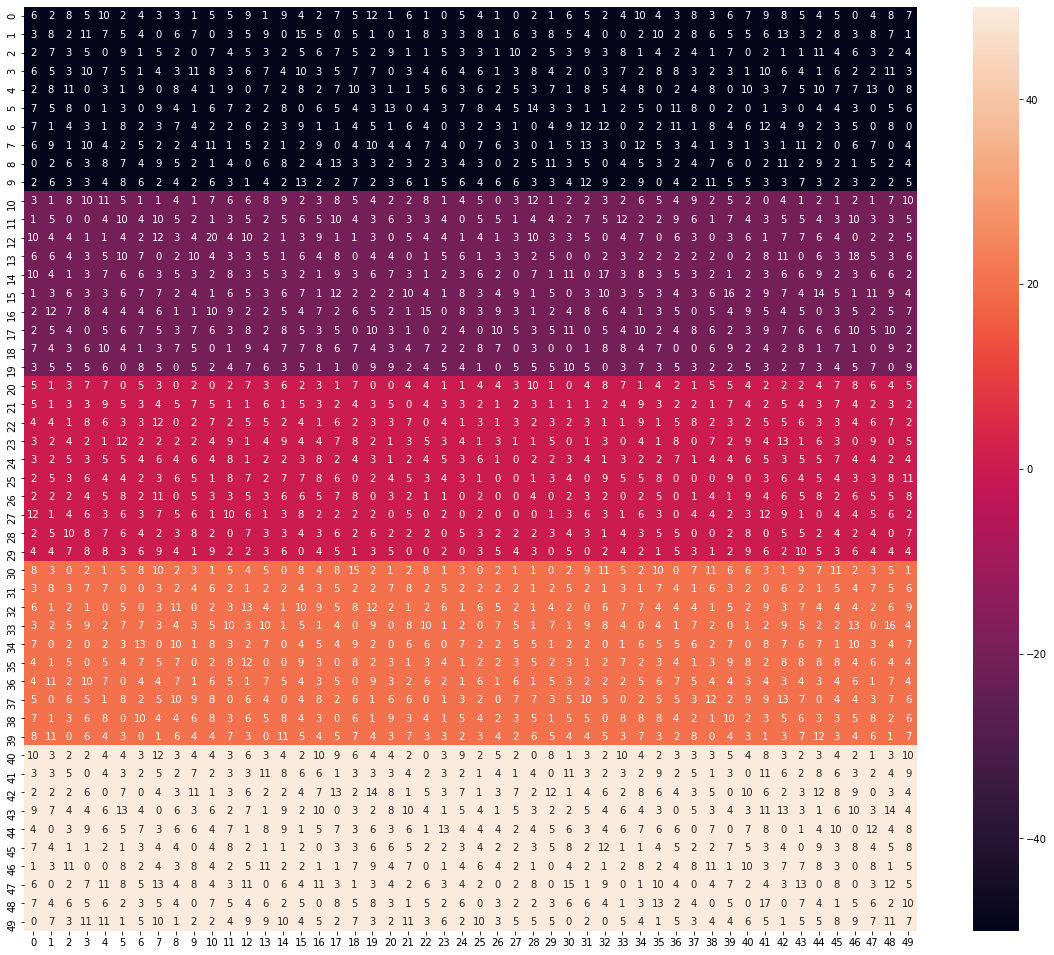

<Figure size 1440x1224 with 0 Axes>

In [25]:
fig = plt.figure(figsize=(20,17)) 
max_time = 210
time = list(range(0,max_time))

for i in range(210):
    sns.heatmap(board1.temp, annot = animalcount1[i])
    clear_output(wait = True) #Keeps the plot up rather than creating a new plot each time 
    display(fig)            # Reset display
    fig.clear() 